In [1]:
from embedder import Embedder
from data_provider import DataProvider

ImportError: cannot import name 'Embedder' from 'embedder' (/tmp/pycharm_project_732/embedder.py)

In [2]:
import os
os.environ['TRANSFORMERS_CACHE'] = '/mounts/work/faeze/.cache/hf/'
os.environ['HF_HOME'] = '/mounts/work/faeze/.cache/hf/'
os.environ['HF_DATASETS_CACHE'] = '/mounts/work/faeze/.cache/hf/'
os.environ['TORCH_HUB'] = '/mounts/work/faeze/.cache/torch/'
os.environ['TORCH_HOME'] = '/mounts/work/faeze/.cache/torch/'
os.environ["WANDB_DIR"] = '/mounts/work/faeze/.cache/wandb/'

In [3]:
data_provider_ = DataProvider()

In [4]:
languages = ['en', 'tr', 'de', 'hr', 'ru', 'sq']
types = ['Gao', 'Trac', 'Wul']

datas = [f'parallel_data/{i}-Trac' for i in languages]

In [5]:
datasets = data_provider_.load_datasets(datas, languages)

/mounts/work/faeze/new_miniconda3/envs/2024_9/lib/python3.10/site-packages/datasets/load.py:929: FutureWarning: The repository for parallel_data contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at parallel_data/parallel_data.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [6]:
datasets

[{'name': 'parallel_data/en-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'en'},
 {'name': 'parallel_data/tr-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'tr'},
 {'name': 'parallel_data/de-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'de'},
 {'name': 'parallel_data/hr-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'hr'},
 {'name': 'parallel_data/ru-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'ru'},
 {'name': 'parallel_data/sq-Trac',
  'split': 'test',
  'data': Dataset({
      features: ['id', 'text', 'label'],
      num_rows: 300
  }),
  'language': 'sq'}]

In [7]:
def get_similarity(model_name):
    embedder_ = Embedder(model_name=model_name)
    embeddings, metadatas = embedder_.embed_datasets(datasets)
    
    similarities_labse = [[Embedder.calculate_similarity(embeddings[i], embeddings[j]) for i in range(len(embeddings))] for j in range(len(embeddings))]
    
    return similarities_labse

In [8]:
languages = ['en', 'tr', 'de', 'hr', 'ru', 'sq']

In [9]:
get_similarity('labse')

/mounts/Users/cisintern/faeze/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[[1.0, 0.8507115, 0.8764984, 0.864822, 0.8500935, 0.86972445],
 [0.8507115, 1.0, 0.8700883, 0.85587645, 0.8503196, 0.86449075],
 [0.8764984, 0.8700883, 1.0, 0.8847523, 0.87547, 0.887765],
 [0.864822, 0.85587645, 0.8847523, 1.0, 0.86513895, 0.87726635],
 [0.8500935, 0.8503196, 0.87547, 0.86513895, 1.0, 0.8625069],
 [0.86972445, 0.86449075, 0.887765, 0.87726635, 0.8625069, 1.0]]

In [10]:
get_similarity('minilm')

[[1.0, 0.818311, 0.8653514, 0.83777755, 0.83702654, 0.8426091],
 [0.818311, 1.0, 0.8477959, 0.8330231, 0.8196194, 0.82711464],
 [0.8653514, 0.8477959, 1.0, 0.8678736, 0.8507897, 0.85645354],
 [0.83777755, 0.8330231, 0.8678736, 1.0, 0.8514728, 0.855694],
 [0.83702654, 0.8196194, 0.8507897, 0.8514728, 1.0, 0.8294452],
 [0.8426091, 0.82711464, 0.85645354, 0.855694, 0.8294452, 1.0]]

In [11]:
get_similarity('e5-large')

[[1.0, 0.9117239, 0.9210977, 0.92152387, 0.9130653, 0.91915405],
 [0.9117239, 1.0, 0.9092216, 0.90738076, 0.9025633, 0.9071667],
 [0.9210977, 0.9092216, 1.0, 0.91157144, 0.9081116, 0.90652454],
 [0.92152387, 0.90738076, 0.91157144, 1.0, 0.91007245, 0.93141794],
 [0.9130653, 0.9025633, 0.9081116, 0.91007245, 1.0, 0.9130413],
 [0.91915405, 0.9071667, 0.90652454, 0.93141794, 0.9130413, 1.0]]

In [12]:
get_similarity('e5-base')

[[1.0, 0.9046844, 0.9188286, 0.9092534, 0.9047353, 0.9120194],
 [0.9046844, 1.0, 0.90525144, 0.9032837, 0.8981722, 0.90400577],
 [0.9188286, 0.90525144, 1.0, 0.90469766, 0.89786315, 0.90233684],
 [0.9092534, 0.9032837, 0.90469766, 1.0, 0.9046619, 0.9259556],
 [0.9047353, 0.8981722, 0.89786315, 0.9046619, 1.0, 0.9072712],
 [0.9120194, 0.90400577, 0.90233684, 0.9259556, 0.9072712, 1.0]]

In [13]:
get_similarity('xlmr-large')

No sentence-transformers model found with name FacebookAI/xlm-roberta-large. Creating a new one with mean pooling.


[[1.0, 0.9962819, 0.99695426, 0.9960838, 0.9972907, 0.9944049],
 [0.9962819, 1.0, 0.9957483, 0.9952305, 0.99611723, 0.99375266],
 [0.99695426, 0.9957483, 1.0, 0.9954231, 0.9967803, 0.99382865],
 [0.9960838, 0.9952305, 0.9954231, 1.0, 0.99599427, 0.99393696],
 [0.9972907, 0.99611723, 0.9967803, 0.99599427, 1.0, 0.99426454],
 [0.9944049, 0.99375266, 0.99382865, 0.99393696, 0.99426454, 1.0]]

In [14]:
get_similarity('xlmr-base')

No sentence-transformers model found with name FacebookAI/xlm-roberta-base. Creating a new one with mean pooling.


[[1.0, 0.99655825, 0.9973267, 0.9972212, 0.9974817, 0.9948906],
 [0.99655825, 1.0, 0.9964379, 0.99658245, 0.9965115, 0.9950871],
 [0.9973267, 0.9964379, 1.0, 0.9965574, 0.99730754, 0.9951247],
 [0.9972212, 0.99658245, 0.9965574, 1.0, 0.99712676, 0.99526346],
 [0.9974817, 0.9965115, 0.99730754, 0.99712676, 1.0, 0.9951294],
 [0.9948906, 0.9950871, 0.9951247, 0.99526346, 0.9951294, 1.0]]

In [15]:
get_similarity('arctic-large')

[[1.0, 0.7601425, 0.8492149, 0.7809336, 0.772373, 0.766202],
 [0.7601425, 1.0, 0.7504126, 0.7450613, 0.7209787, 0.7424135],
 [0.8492149, 0.7504126, 1.0, 0.7847252, 0.7740772, 0.77128756],
 [0.7809336, 0.7450613, 0.7847252, 1.0, 0.7664104, 0.77094495],
 [0.772373, 0.7209787, 0.7740772, 0.7664104, 1.0, 0.7389719],
 [0.766202, 0.7424135, 0.77128756, 0.77094495, 0.7389719, 1.0]]

In [16]:
# get_similarity('arctic-base')

In [17]:
# get_similarity('m3')

In [18]:

embedder_ = Embedder(model_name="labse")
embeddings, metadatas = embedder_.embed_datasets(datasets)

In [19]:
import numpy as np
embed = np.vstack(embeddings)
metadata = metadatas

In [20]:
len(metadata), embed.shape

(1800, (1800, 768))

In [21]:
embed.shape

(1800, 768)

In [22]:
clusters = Embedder.cluster_embeddings(embed, metadata, 300)
clusters

array([237,  25,  15, ..., 151, 153, 280], dtype=int32)

In [24]:
clusters[0], clusters[300], clusters[600]

(237, 237, 237)

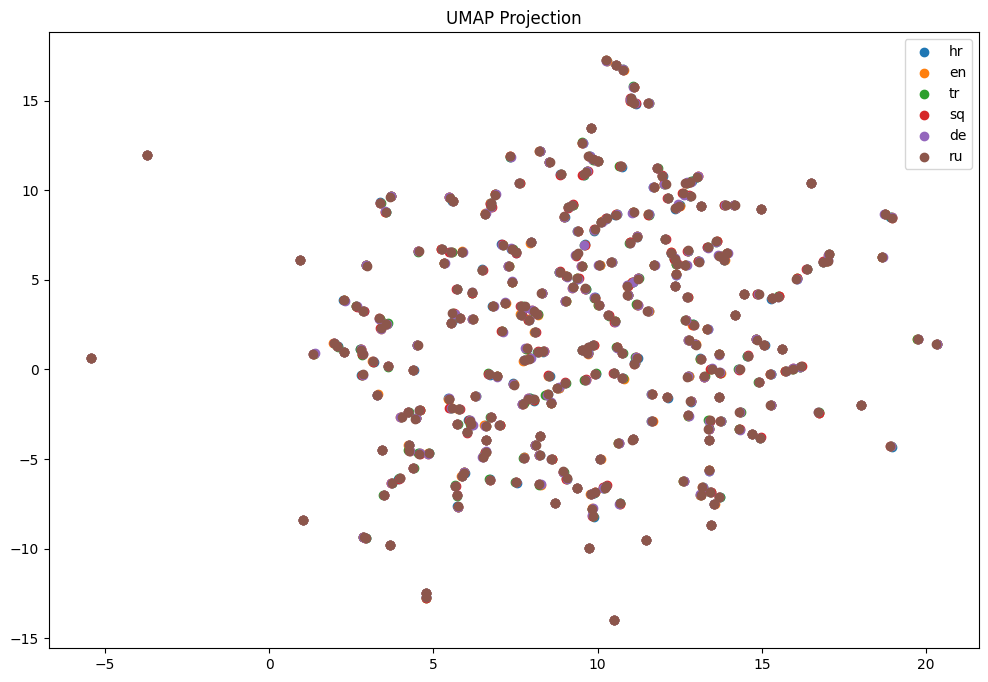

In [25]:
Embedder.visualize_embeddings(embed, metadatas)

In [26]:
from retriever import Retriever
retriever = Retriever(embedder_.embedding_dim, index_type="HNSW")

In [27]:
retriever.add_embeddings(embed, metadata)

In [28]:
retriever.retrieve(embeddings[0][5].reshape(1,-1), k=10)

[{'metadata': {'text': 'An apostle of Peace and  mother to all who were deprived and unwanted  by society.....',
   'label': 0,
   'id': '5',
   'dataset_name': 'parallel_data/en-Trac',
   'language': 'en'},
  'score': 0.0},
 {'metadata': {'text': 'Апостолом мира и матери всех, кто был лишен и нежелателен обществом .....',
   'label': 0,
   'id': '5',
   'dataset_name': 'parallel_data/ru-Trac',
   'language': 'ru'},
  'score': 0.27929688},
 {'metadata': {'text': 'Apostol mira i majka svima koji društveno lišeni i nepoželjni.....',
   'label': 0,
   'id': '5',
   'dataset_name': 'parallel_data/hr-Trac',
   'language': 'hr'},
  'score': 0.2819863},
 {'metadata': {'text': 'Apostull paqjeje dhe nënë për të gjithë ata privuarit dhe të padëshiruarit nga shoqëria .....',
   'label': 0,
   'id': '5',
   'dataset_name': 'parallel_data/sq-Trac',
   'language': 'sq'},
  'score': 0.35936093},
 {'metadata': {'text': 'Ein Apostel des Friedens und eine Mutter für alle, die von der Gesellschaft beraub

In [29]:
metadatas[5]

{'text': 'An apostle of Peace and  mother to all who were deprived and unwanted  by society.....',
 'label': 0,
 'id': '5',
 'dataset_name': 'parallel_data/en-Trac',
 'language': 'en'}